In [1]:
from google.colab import files

uploaded_file = files.upload()

Saving epa-sea-level.csv to epa-sea-level.csv


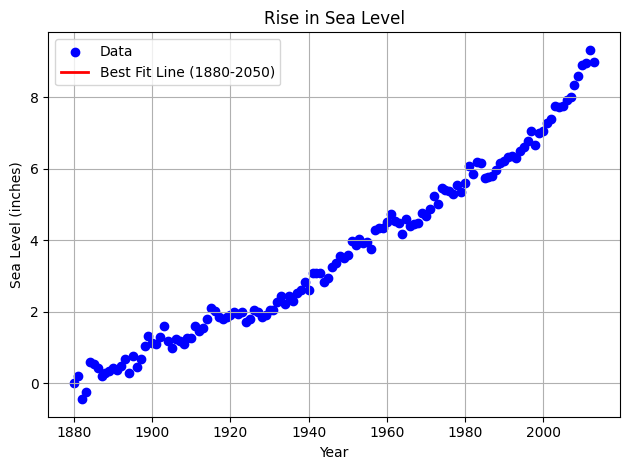

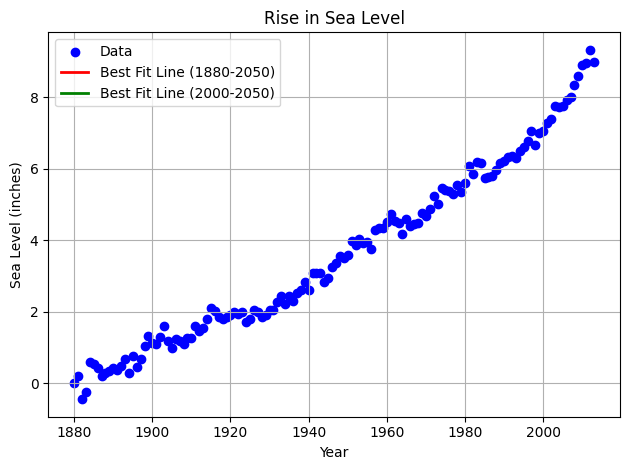

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# Load the dataset
file_path = 'epa-sea-level.csv'  # Replace with the path to your CSV file
sea_level_data = pd.read_csv(file_path)

# Extract relevant data
years = sea_level_data['Year']
sea_levels = sea_level_data['CSIRO Adjusted Sea Level']

# Create scatter plot
plt.scatter(years, sea_levels, label="Data", color='blue')

# Perform linear regression on the full dataset
slope, intercept, r_value, p_value, std_err = linregress(years, sea_levels)

# Predict sea level up to 2050
years_extended = np.arange(1880, 2051)
sea_level_pred = intercept + slope * years_extended

# Plot the line of best fit for the full dataset
plt.plot(years_extended, sea_level_pred, 'r', label='Best Fit Line (1880-2050)', linewidth=2)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Save and show the plot for the full dataset
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sea_level_rise_full_fit.png')
plt.show()

# Filter data from the year 2000 onward
recent_data = sea_level_data[sea_level_data['Year'] >= 2000]
recent_years = recent_data['Year']
recent_sea_levels = recent_data['CSIRO Adjusted Sea Level']

# Perform linear regression on the recent data (2000 onwards)
recent_slope, recent_intercept, _, _, _ = linregress(recent_years, recent_sea_levels)

# Predict sea level up to 2050 using recent data trend
recent_sea_level_pred = recent_intercept + recent_slope * years_extended

# Create scatter plot for recent data with both lines of best fit
plt.scatter(years, sea_levels, label="Data", color='blue')

# Plot the line of best fit for the full dataset (1880-2050)
plt.plot(years_extended, sea_level_pred, 'r', label='Best Fit Line (1880-2050)', linewidth=2)

# Plot the line of best fit for recent data (2000-2050)
plt.plot(years_extended, recent_sea_level_pred, 'green', label='Best Fit Line (2000-2050)', linewidth=2)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Save and show the plot with both lines of best fit
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sea_level_rise_recent_fit.png')
plt.show()